## Exercise sheet 4

### Exercise 1

We are getting back to the Kalahari foragers population study by Nancy Howell. After having installed the rethinking package (see above), fit a linear model between heights as in the course. Some individuals got only their weights recorded during the census: 43, 36, 52, 44, 69 kg. Compute the predicted heights for these individuals along with credible intervals of your choice (specify them).

In [15]:
library(rethinking)
data(Howell1)
d <- Howell1

# Height and weight of all individuals aged 18 or higher
d2 <- d[d$age >=  18, ]

We construct a model as in the course. The height $h_i$ is a normal distribution around some value depending on the offset parameter $\alpha$ and a linear parameter $\beta$ of the weight $x_i$.

$$\mu_i = \alpha + \beta x_i$$

We also take the standard deviation $\sigma$ as a parameter of the model, where we note that it does not depend on the weight $x$.

$$h_i \sim \text{Normal}(\mu_i, \sigma) = \text{Normal}(\alpha + \beta x_i, \sigma)$$

As a prior probability of the parameters we take $\alpha$ and $\beta$ to be normally distributed, and for $\sigma$ we take a non-negative, uniform distribution.

$$\alpha \sim \text{Normal}(178, 100)$$
$$\beta \sim \text{Normal}(0, 10)$$
$$\sigma \sim \text{Uniform}(0, 50)$$

In [16]:
flist <- alist(height~dnorm(mu, sigma), mu<-alpha+beta*weight, alpha~dnorm(178, 100), beta~dnorm(0,10), sigma~dunif(0,50))

# The parameters as determined by the maximum a porsteriori fit
output <- map(flist, data=d2)

summary(output)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
alpha,113.9033810,1.9052673,110.8583959,116.9483661
beta,0.9045064,0.0419201,0.8375099,0.9715028
sigma,5.0718673,0.1911533,4.7663675,5.3773672


We thus get the mean and the standard deviation for the parameters $a$ $b$ and $sigma$. Lets find the predicted heights for the individuals where only the height has been reported.

In [17]:
# How do you extract the parameters automatically?
alpha <- 113.9057445
beta <- 0.9044537

# Weights array of the inviduals without height data
new_weights <- c(43, 36, 52, 44, 69)

# Predicted heights given the weights
new_heights <- alpha + beta * new_weights

new_heights

[1] 152.7973 146.4661 160.9373 153.7017 176.3130

Thus the predicted heights are

$$[152.7, 146.4, 160.9, 153.7, 176.3]$$

To find the credible interval we have to sample the posterior dirstribution.

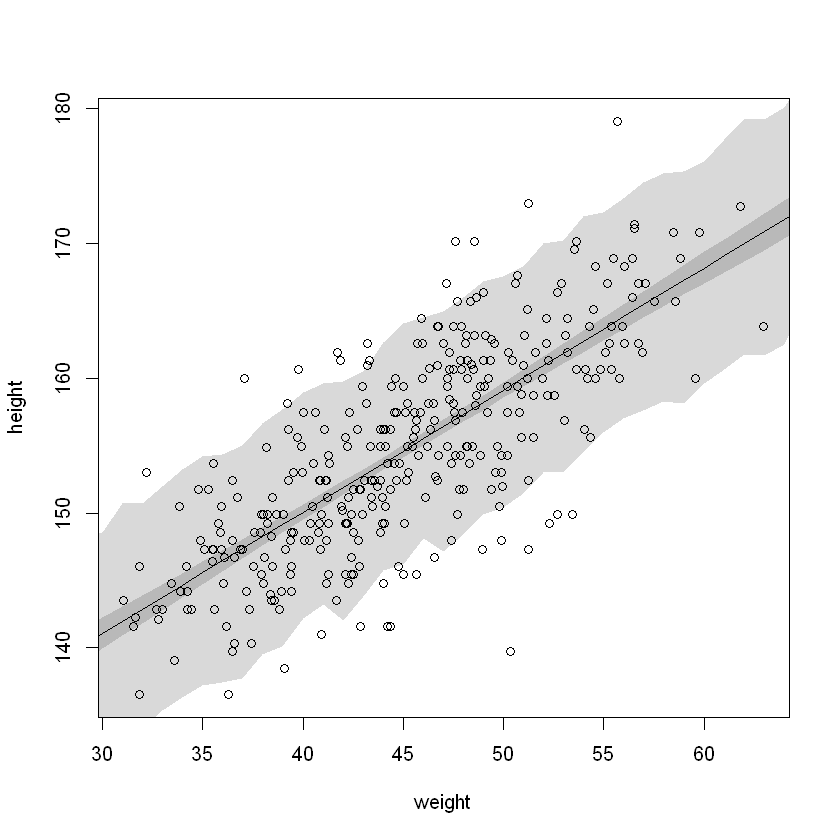

In [18]:
# Sampling the posterior distribution of the parameters
post <- extract.samples(output)
mu.link <- function(weight) post$a + post$b * weight

# Defining the weight grid
weight.seq <- seq(from = 25, to = 70, by = 1)

# For each weight value we calculate a 91 percent credible interval
mu <- sapply(weight.seq, mu.link)
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(height ~ weight, d2)
lines(weight.seq, mu.mean)
shade(mu.HPDI, weight.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
sim.height <- sim(output, data=list(weight = weight.seq))
height.PI <- apply(sim.height, 2, HPDI, prob = 0.91)
shade(height.PI, weight.seq)

Thus we may identify the 91 percent credible interval for each individual without height measurement.

In [19]:
new_weights
mu.mean[new_weights - 24]
height.PI[, new_weights - 24]

[1] 43 36 52 44 69

[1] 152.7937 146.4593 160.9379 153.6986 176.3215

|0.91,143.8225,137.3975,152.9829,145.7550,167.3198
0.91|,160.4976,154.3310,169.9818,162.6241,184.5086


This data can be read as the first individum with weight 43 has a height between 144.1 and 161.1 with 91 precent probability.

### Exercise 2

The census performed on the Kalahari foragers include both children and adults. We focused on the latter in the course by specifically selecting individuals who are at least 18 years old. For this exercise, select individuals with ages less than 18 years old.

1. Fit a linear model to these data. Summarise your findings (best-fit parameters values and credible intervals) and comment both on the model (incl. parameters behaviour) and the results.

This has been done above.

2. Check the model fit by superimposing the mean model with the raw data on a plot. Include the highest-probability density interval (HPDI) for the mean and for the predicted heights. Comment on the results.

We see that the HPDI is centered around not the predicted mu, but the mean of the data?

3. Is this a good model? If not, explain why and elaborate on the possible (ie: real-world process) origin.

The model needs improvement as the sigma does not depend on the weight itself. And as we dont have the same amount of data for all weight ranges, we also need to repsect this.

4. How this model could be improved? What assumptions would you change to improve the results?

As said we can change sigma to depend on the weight, which would look as

$$\sigma_i = \gamma + \delta x_i,$$

where $\gamma$ and $\delta$ are normally distributed parameters.

## Exercise 3

We would like to model the heights of all Kalahari foragers with no selection biases on their ages (i.e.: including both children and adults in the model). Here the key is to use the log scale.

1. Try different types of models and comment on your estimates (mean and credible intervals). Do you identify a satisfactory fit? Summarise and critique your results.

We now consider a model where we make the standard deviation of the height normal distribution linearly dependent on the weight

$$h_i \sim \text{Normal}(\mu_i, \sigma_i) = \text{Normal}(\alpha + \beta x_i, \gamma + \delta x_i),$$

with the priors

$$\alpha \sim \text{Normal}(178, 100),$$
$$\beta \sim \text{Normal}(0, 10),$$
$$\gamma \sim \text{Normal}(25, 10),$$
$$\delta \sim \text{Normal}(0, 10).$$

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
alpha,85.3574696,1.64907888,82.721923,87.9930162
beta,1.5011291,0.03885977,1.439024,1.5632345
gamma,15.5111789,0.85039966,14.152076,16.8702818
delta,-0.1824824,0.01868336,-0.212342,-0.1526228


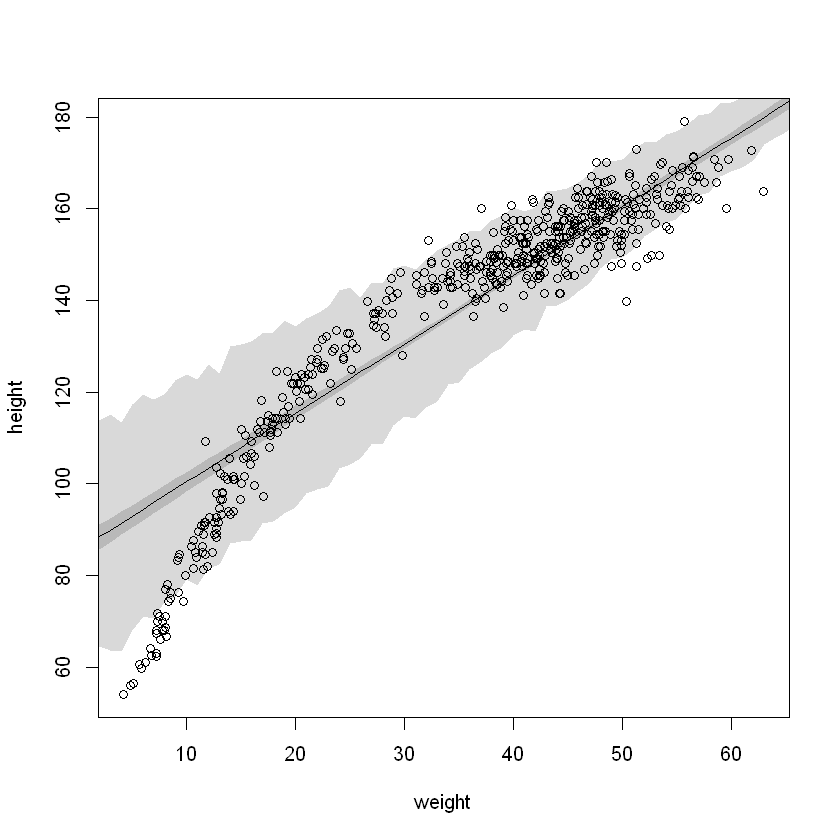

In [20]:
flist <- alist(height~dnorm(mu, sigma), mu<-alpha+beta*weight, sigma~gamma+delta*weight, alpha~dnorm(178, 100), beta~dnorm(0,10), gamma~dnorm(25,10), delta~dnorm(0, 10))

# The parameters as determined by the maximum a porsteriori fit
output <- map(flist, data=d)

summary(output)

# Sampling the posterior distribution of the parameters
post <- extract.samples(output)
mu.link <- function(weight) post$a + post$b * weight

# Defining the weight grid
weight.seq <- seq(from = 0, to = 70, by = 1)

# For each weight value we calculate a 91 percent credible interval
mu <- sapply(weight.seq, mu.link)
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(height ~ weight, d)
lines(weight.seq, mu.mean)
shade(mu.HPDI, weight.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
sim.height <- sim(output, data=list(weight = weight.seq))
height.PI <- apply(sim.height, 2, HPDI, prob = 0.91)
shade(height.PI, weight.seq)

Having done the model this way, we now want to consider different fits. After the linear fit we look at the quadratic. We modify the relation to the height variable and introduce a quadratic parameter.

$$h_i \sim \text{Normal}(\mu_i, \sigma_i) = \text{Normal}(\alpha + \beta x_i + \epsilon x_i^2, \gamma + \delta x_i)$$

The priors we take as before, for $\epsilon$ we take

$$\epsilon \sim \text{Normal}(25, 10).$$

In [25]:
# Yeah idk why this doesnt work

flist <- alist(height~dnorm(mu, sigma),
mu<-alpha+beta*weight+epsilon*weight*weight,
sigma~gamma+delta*weight, alpha~dnorm(178, 100),
beta~dnorm(0,10),
gamma~dnorm(0,10),
delta~dnorm(0, 10),
epsilon~dnorm(0,10))

# The parameters as determined by the maximum a porsteriori fit
output <- map(flist, data=d)

summary(output)

# Sampling the posterior distribution of the parameters
post <- extract.samples(output)

summary(post)

mu.link <- function(weight) post$alpha + post$beta * weight + post$epsilon * weight * weight

# Defining the weight grid
weight.seq <- seq(from = 1, to = 70, by = 1)

# For each weight value we calculate a 91 percent credible interval
mu <- sapply(weight.seq, mu.link)
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(height ~ weight, d)
lines(weight.seq, mu.mean)
shade(mu.HPDI, weight.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
sim.height <- sim(output, data=list(weight = weight.seq))
height.PI <- apply(sim.height, 2, HPDI, prob = 0.91)
shade(height.PI, weight.seq)

ERROR: Error in map(flist, data = d): Anfangswert in 'vmmin' ist nicht endlich


Stangely a qubic field does work, but a quadratic doesnt. This might have some easy explaination, but I cant think of one at the moment. Nonetheless, the cubic looks like quite a good fit.

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
alpha,45.806960899,1.497906816,43.41301650,48.20090530
beta,4.204609233,0.111900888,4.02577000,4.38344847
gamma,5.850332288,0.528320218,5.00597454,6.69469004
delta,-0.002652652,0.013889700,-0.02485108,0.01954577
epsilon,-0.038582818,0.001745403,-0.04137231,-0.03579333


     alpha            beta           gamma           delta          
 Min.   :40.30   Min.   :3.793   Min.   :3.946   Min.   :-0.052223  
 1st Qu.:44.78   1st Qu.:4.129   1st Qu.:5.510   1st Qu.:-0.012102  
 Median :45.81   Median :4.203   Median :5.853   Median :-0.002670  
 Mean   :45.81   Mean   :4.204   Mean   :5.857   Mean   :-0.002824  
 3rd Qu.:46.81   3rd Qu.:4.278   3rd Qu.:6.205   3rd Qu.: 0.006426  
 Max.   :51.27   Max.   :4.642   Max.   :7.852   Max.   : 0.051224  
    epsilon        
 Min.   :-0.04554  
 1st Qu.:-0.03973  
 Median :-0.03857  
 Mean   :-0.03856  
 3rd Qu.:-0.03740  
 Max.   :-0.03224  

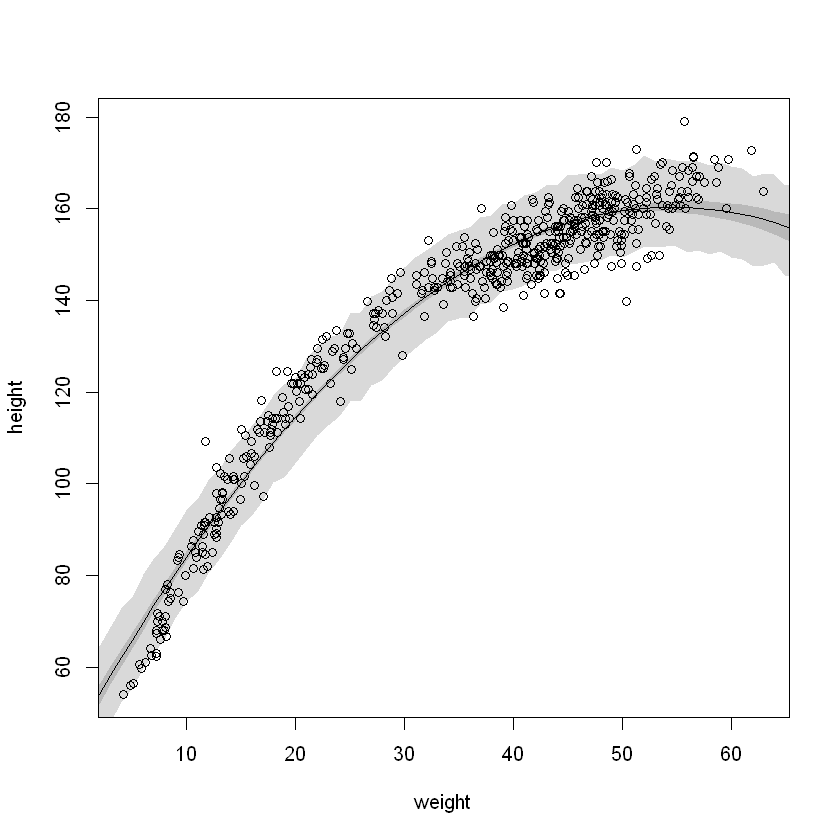

In [23]:
flist <- alist(height~dnorm(mu, sigma),
mu<-alpha+beta*weight+epsilon*weight*weight,
sigma~gamma+delta*weight, alpha~dnorm(178, 100),
beta~dnorm(0,10),
gamma~dnorm(25,10),
delta~dnorm(0, 10),
epsilon~dnorm(25,10))

# The parameters as determined by the maximum a porsteriori fit
output <- map(flist, data=d)

summary(output)

# Sampling the posterior distribution of the parameters
post <- extract.samples(output)

summary(post)

mu.link <- function(weight) post$alpha + post$beta * weight + post$epsilon * weight * weight

# Defining the weight grid
weight.seq <- seq(from = 0, to = 70, by = 1)

# For each weight value we calculate a 91 percent credible interval
mu <- sapply(weight.seq, mu.link)
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(height ~ weight, d)
lines(weight.seq, mu.mean)
shade(mu.HPDI, weight.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
sim.height <- sim(output, data=list(weight = weight.seq))
height.PI <- apply(sim.height, 2, HPDI, prob = 0.91)
shade(height.PI, weight.seq)

We also want to look at logarithmic models as hinted at during the lecture.

In [27]:
flist <- alist(height~dnorm(mu, sigma),
mu<-alpha+beta*log(weight),
sigma~gamma+delta*weight, alpha~dnorm(178, 100),
beta~dnorm(0,10),
gamma~dnorm(25,10),
delta~dnorm(0, 10))

# The parameters as determined by the maximum a porsteriori fit
output <- map(flist, data=d)

summary(output)

# Sampling the posterior distribution of the parameters
post <- extract.samples(output)

summary(post)

mu.link <- function(weight) post$alpha + post$beta * log(weight)

# Defining the weight grid
weight.seq <- seq(from = 1, to = 70, by = 1)

# For each weight value we calculate a 91 percent credible interval
mu <- sapply(weight.seq, mu.link)
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(height ~ weight, d)
lines(weight.seq, mu.mean)
shade(mu.HPDI, weight.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
sim.height <- sim(output, data=list(weight = weight.seq))
height.PI <- apply(sim.height, 2, HPDI, prob = 0.91)
shade(height.PI, weight.seq)

ERROR: Error in map(flist, data = d): Anfangswert in 'vmmin' ist nicht endlich


This doesnt work as well and the error message is not helping either. Thus to conclude the only better model that worked was the qubic model and it fit the data quite well. Although if I were to repair the calculation for the other models that would definitly inspire more confidence in the findings.

2. As in exercise 2, sample from the posterior distribution and superimpose the raw data with the model uncertainty on the mean and the predicted heights.

As I did above.